In [1]:
#This notebook uses dual moving average crossover to determine when to buy or sell stock

In [2]:
#Install the dependencies
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Load the data
SP500 = pd.read_csv('sp500.csv')

In [4]:
SP500.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1421,2020-08-25,3435.949951,3444.209961,3425.840088,3443.620117,3443.620117,3619300000
1422,2020-08-26,3449.969971,3481.070068,3444.149902,3478.729980,3478.729980,3754360000
1423,2020-08-27,3485.139893,3501.379883,3468.350098,3484.550049,3484.550049,3929560000
1424,2020-08-28,3494.689941,3509.229980,3484.320068,3508.010010,3508.010010,3855880000
1425,2020-08-31,3509.729980,3514.770020,3493.250000,3500.310059,3500.310059,4342290000


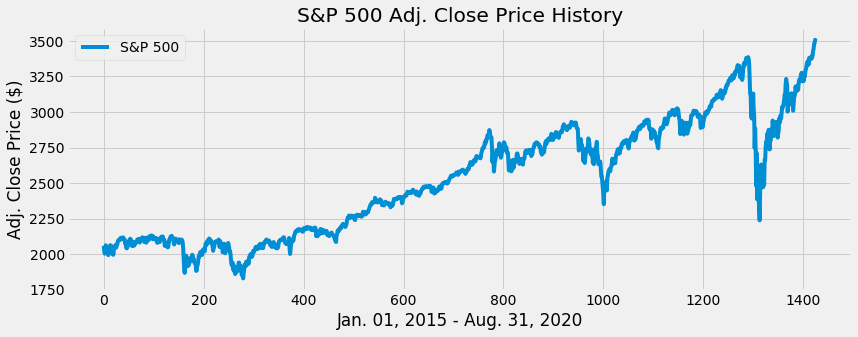

In [5]:
#Visualize
plt.figure(figsize=(12.5, 4.5))
plt.plot(SP500['Adj Close'], label='S&P 500')
plt.title('S&P 500 Adj. Close Price History')
plt.xlabel('Jan. 01, 2015 - Aug. 31, 2020')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [6]:
#Creating a simple moving average with a 30-day window
SMA30 = pd.DataFrame()
SMA30['Adj. Close Price'] = SP500['Adj Close'].rolling(window=30).mean()

In [7]:
#Creating a simple moving average with a 100-day window
SMA100 = pd.DataFrame()
SMA100['Adj. Close Price'] = SP500['Adj Close'].rolling(window=100).mean()

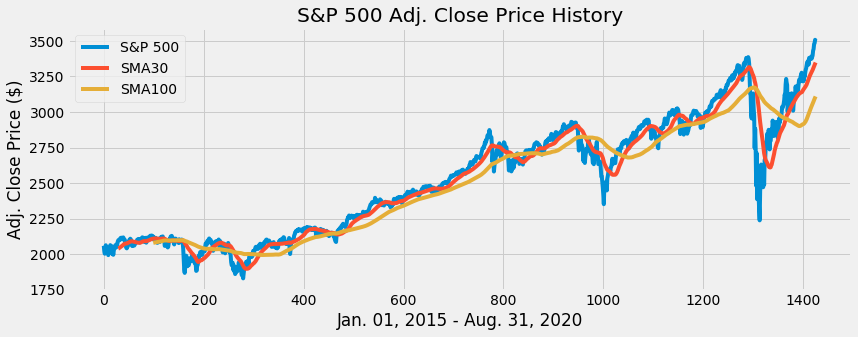

In [8]:
#Visualizing
plt.figure(figsize=(12.5, 4.5))
plt.plot(SP500['Adj Close'], label='S&P 500')
plt.plot(SMA30['Adj. Close Price'], label='SMA30')
plt.plot(SMA100['Adj. Close Price'], label='SMA100')
plt.title('S&P 500 Adj. Close Price History')
plt.xlabel('Jan. 01, 2015 - Aug. 31, 2020')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [9]:
#Create a new dataframe to store data
data = pd.DataFrame()
data['SP500'] = SP500['Adj Close']
data['SMA30'] = SMA30['Adj. Close Price']
data['SMA100'] = SMA100['Adj. Close Price']

In [44]:
#Create a function to signal when to buy and sell stocks
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['SMA30'][i] < data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['SP500'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] > data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['SP500'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)

In [45]:
#Store the buy and sell data intp a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [46]:
data.head()

,SP500,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,2058.199951,NaN,NaN,NaN,NaN
1,2020.579956,NaN,NaN,NaN,NaN
2,2002.609985,NaN,NaN,NaN,NaN
3,2025.900024,NaN,NaN,NaN,NaN
4,2062.139893,NaN,NaN,NaN,NaN


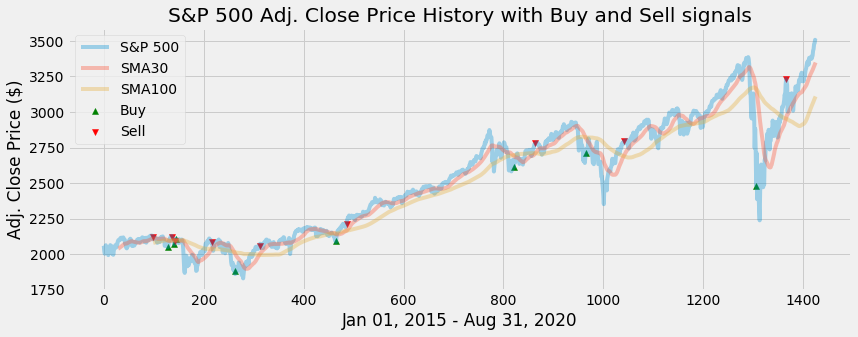

In [47]:
#Visualize all the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(data['SP500'], label = 'S&P 500', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('S&P 500 Adj. Close Price History with Buy and Sell signals')
plt.xlabel('Jan 01, 2015 - Aug 31, 2020')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()